## <center>**PROJECT: ```HR Attrition to Classify whether an Employee will Leave or not```**</center>

## **Introduction**
This challenge uses a dataset from a HR division of a fictional company.
As a member of the data-science team, you’ve been tasked with predicting employee attrition by
building a classifier model using an export of the HR employee database.

The following Python code snippet imports essential libraries for data analysis and machine learning:

In [256]:
import missingno
import pandas as pd
import seaborn as sns
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

## **Dataset Loading**
The following Python code snippet reads data from a csv file using the `pandas` library:

In [257]:
df = pd.read_csv('HR-Employee-Attrition.csv')
print(df.shape)

(1470, 17)


# **EDA**

The following Python code snippet calculates and prints the number of rows in the previously loaded DataFrame:


In [258]:
# Get the number of rows
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 1470


The following Python code snippet displays the first three rows of the previously loaded DataFrame:


In [259]:
df.head(3)

,ID,Age,BusinessTravel,Department,CommutingDistance,Gender,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,Sales,1,Female,94,4,5993,11,3,8,6,4,0,5,Yes
1,2,49,Travel_Frequently,Research & Development,8,Male,61,2,5130,23,4,10,10,7,1,7,No
2,4,37,Travel_Rarely,Research & Development,2,Male,92,3,2090,15,3,7,0,0,0,0,Yes


In [260]:
columns = df.columns
columns

Index(['ID', 'Age', 'BusinessTravel', 'Department', 'CommutingDistance',
       'Gender', 'HourlyRate', 'JobSatisfaction', 'MonthlyIncome',
       'PercentSalaryHike', 'PerformanceRating', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [261]:
df.describe()

,ID,Age,CommutingDistance,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,9.192517,65.891156,2.728571,6502.931293,15.209524,3.153741,11.279592,7.008163,4.229252,2.187755,4.123129
std,602.024335,9.135373,8.106864,20.329428,1.102846,4707.956783,3.659938,0.360824,7.780782,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,1.000000,30.000000,1.000000,1009.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2.000000,48.000000,2.000000,2911.000000,12.000000,3.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,1020.500000,36.000000,7.000000,66.000000,3.000000,4919.000000,14.000000,3.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,1555.750000,43.000000,14.000000,83.750000,4.000000,8379.000000,18.000000,3.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,2068.000000,60.000000,29.000000,100.000000,4.000000,19999.000000,25.000000,4.000000,40.000000,40.000000,18.000000,15.000000,17.000000


### **Checking Missing Values in DataFrame**

The following Python code snippet assesses and displays the number of missing values in each column of a DataFrame:


In [262]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
ID                         0
Age                        0
BusinessTravel             0
Department                 0
CommutingDistance          0
Gender                     0
HourlyRate                 0
JobSatisfaction            0
MonthlyIncome              0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64


<Axes: >

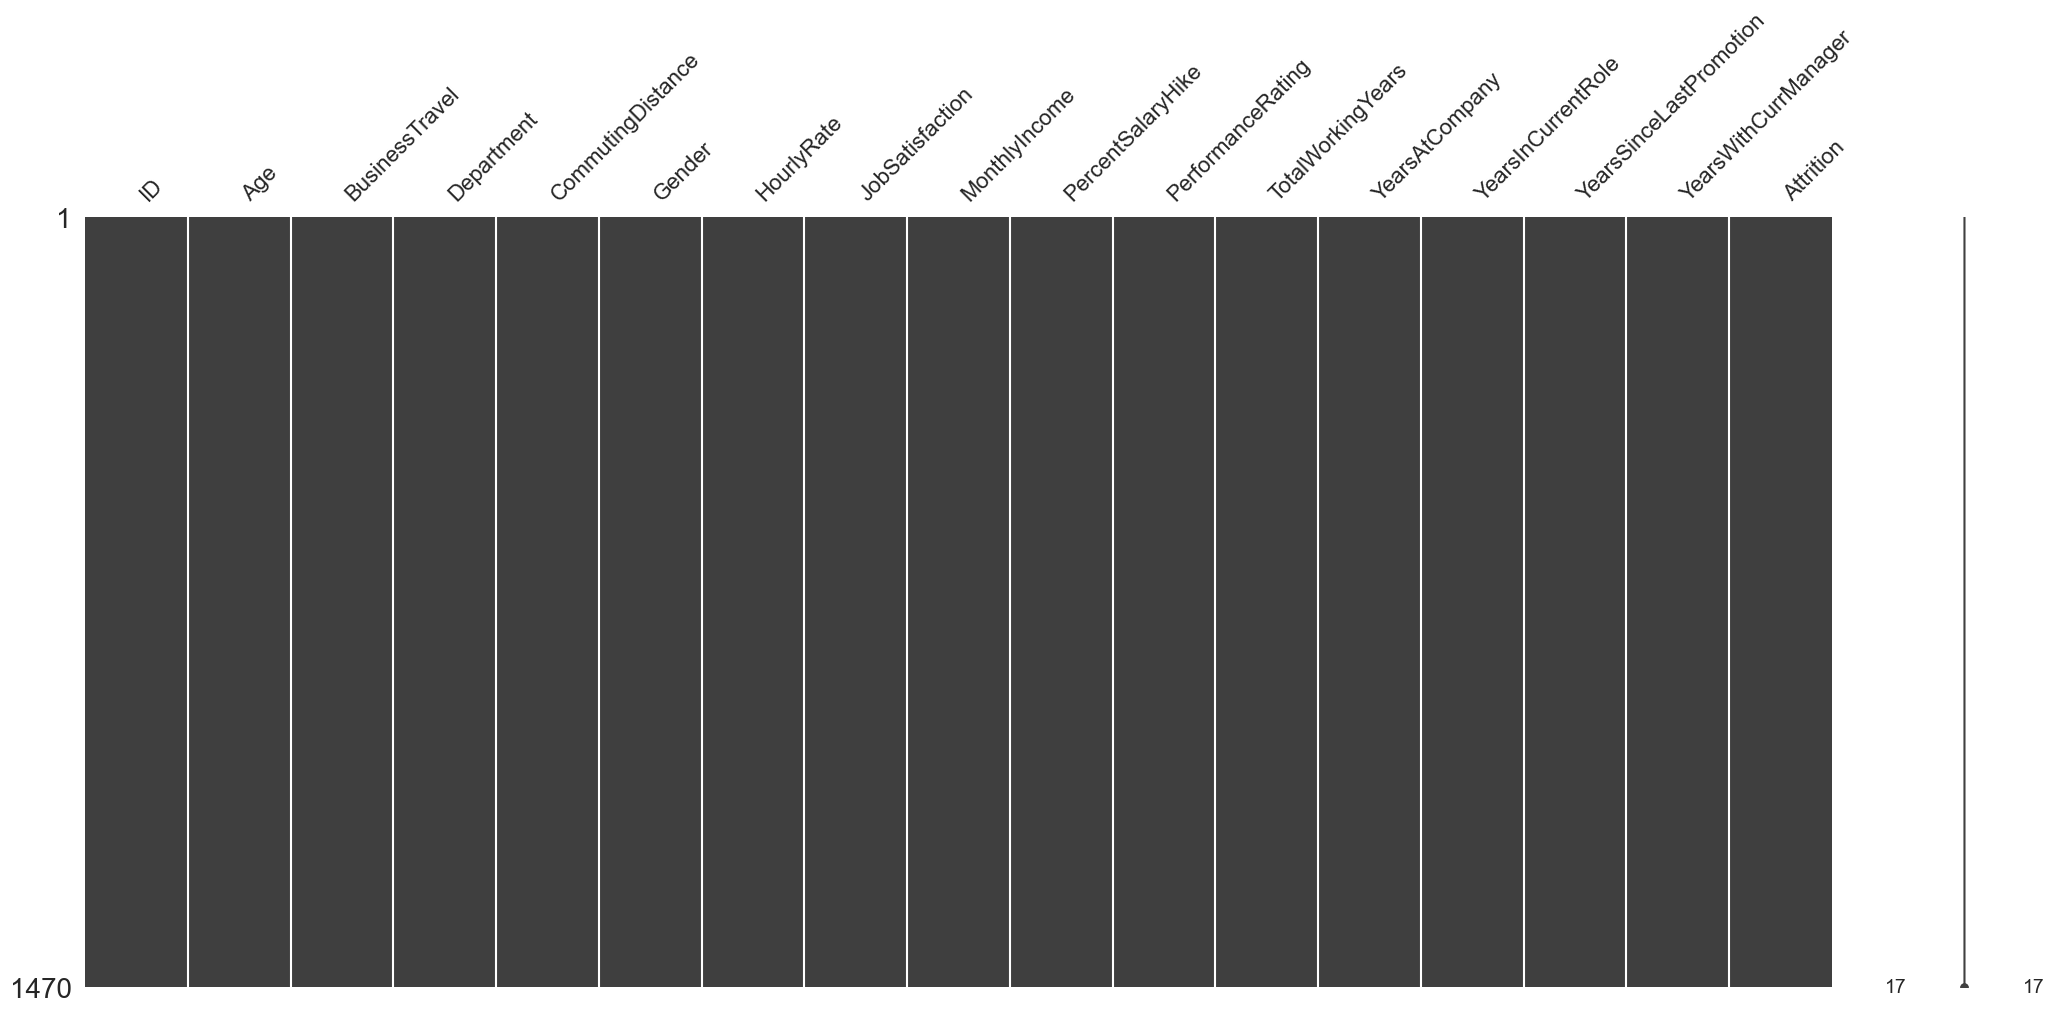

In [263]:
missingno.matrix(df)

### **Visualizing Class Distribution**

The following Python code snippet plots a bar chart to visualize the distribution of each class in the 'Attrition' column:


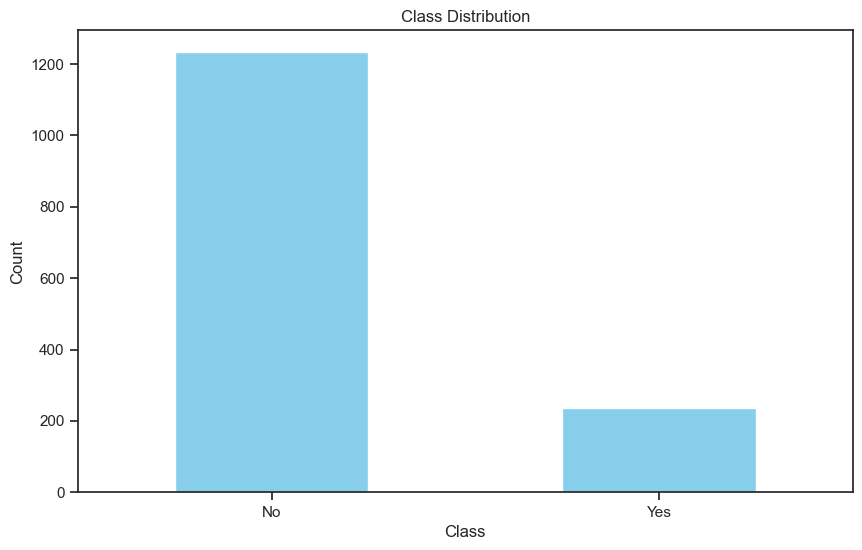

In [264]:
# Plot the distribution of each class in the form of Bar Chart
class_distribution = df["Attrition"].value_counts()
class_distribution.plot(kind='bar', rot=0, color='skyblue', figsize=(10, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [265]:
# The classes are heavily skewed we need to solve this issue later.
print('No Attrition', round(df['Attrition'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Attrition', round(df['Attrition'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Attrition 83.88 % of the dataset
Attrition 16.12 % of the dataset


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17248\761834454.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('No Attrition', round(df['Attrition'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17248\761834454.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Attrition', round(df['Attrition'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


In [266]:
class_counts = df["Attrition"].value_counts()
print(class_counts)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   CommutingDistance        1470 non-null   int64 
 5   Gender                   1470 non-null   object
 6   HourlyRate               1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MonthlyIncome            1470 non-null   int64 
 9   PercentSalaryHike        1470 non-null   int64 
 10  PerformanceRating        1470 non-null   int64 
 11  TotalWorkingYears        1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
 13  YearsInCurrentRole       1470 non-null   int64 
 14  YearsSinceLastPromotion  1470 non-null  

### **Scatter Plot**

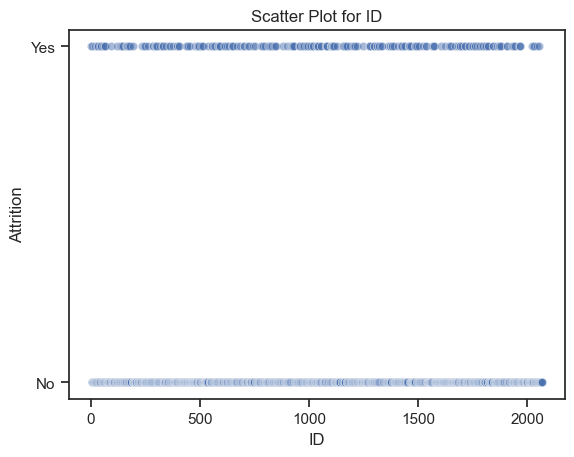

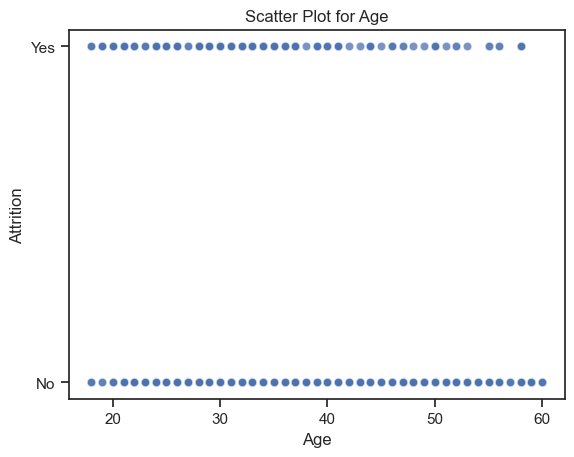

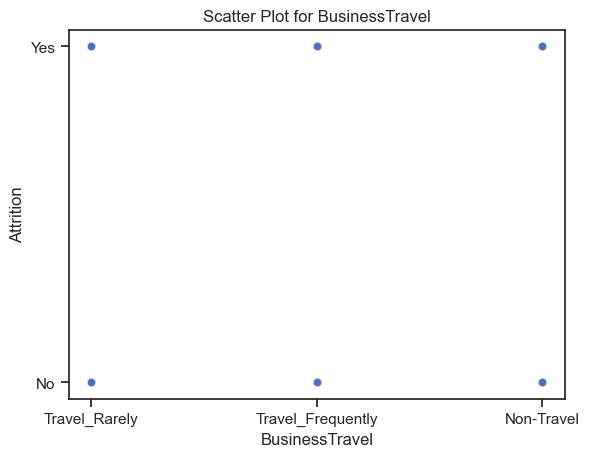

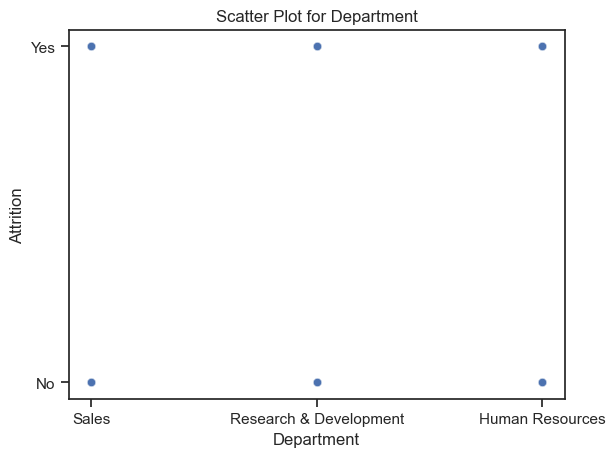

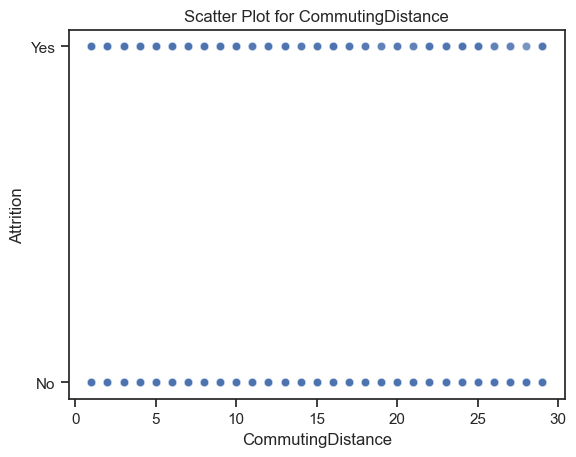

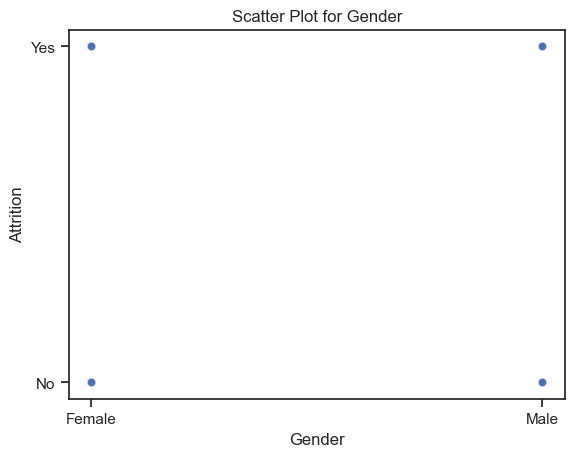

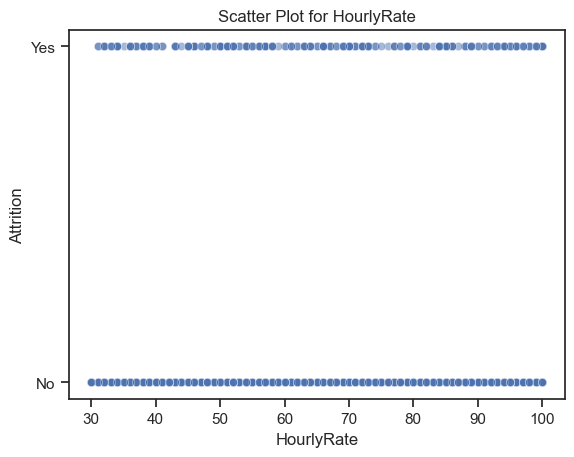

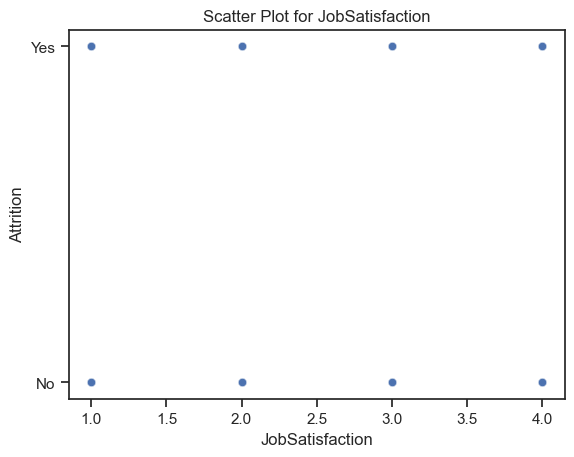

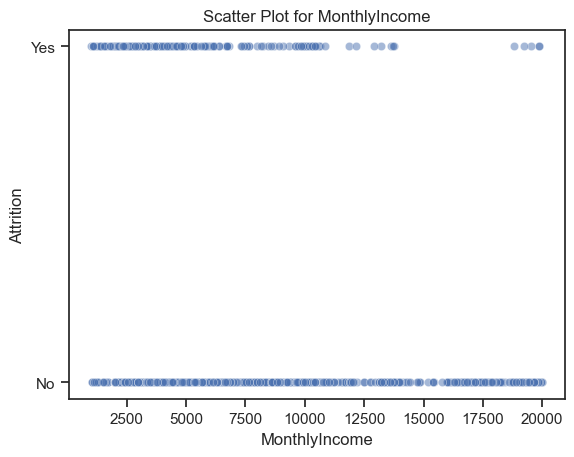

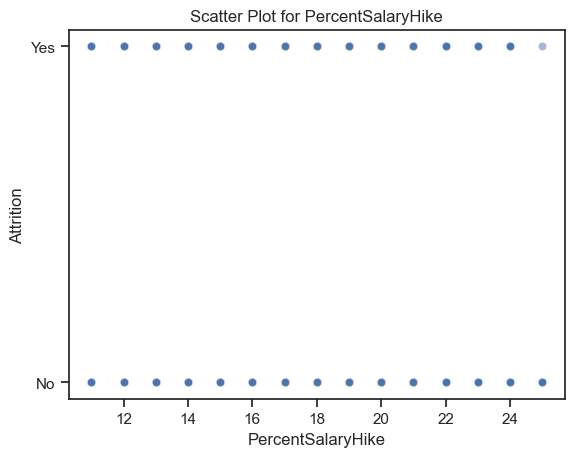

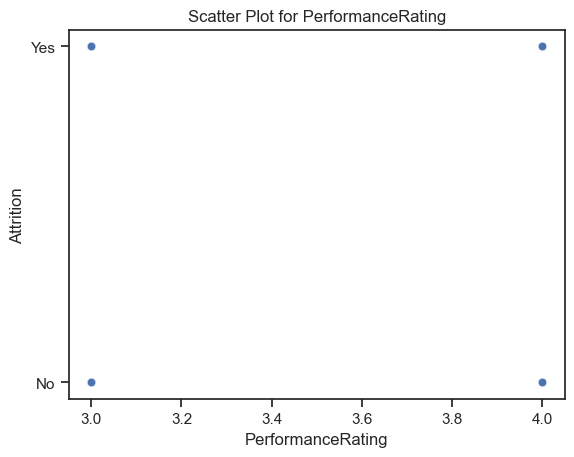

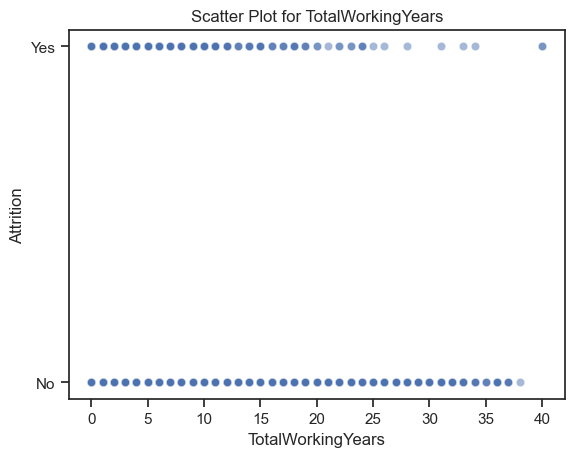

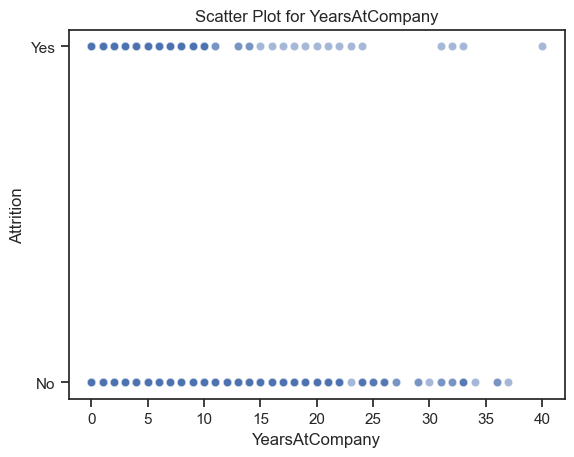

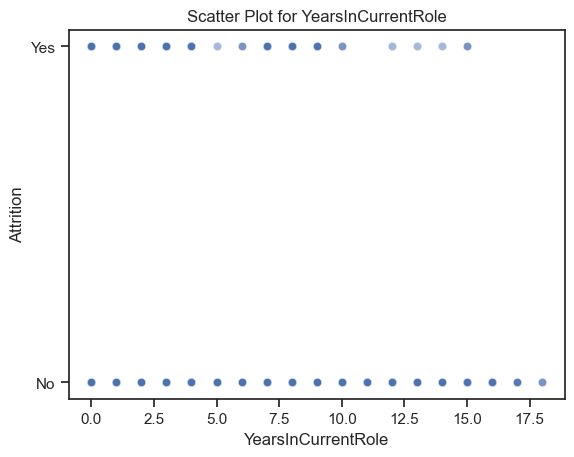

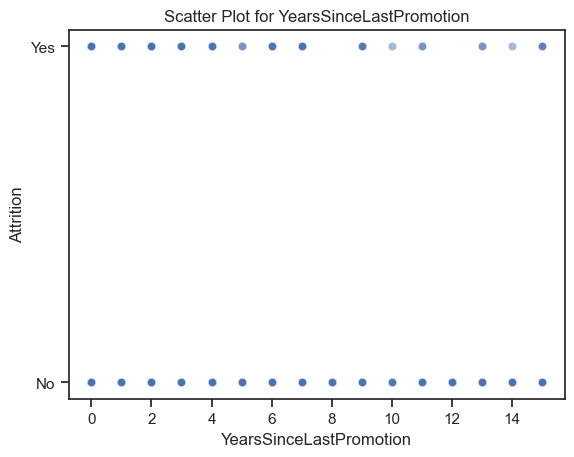

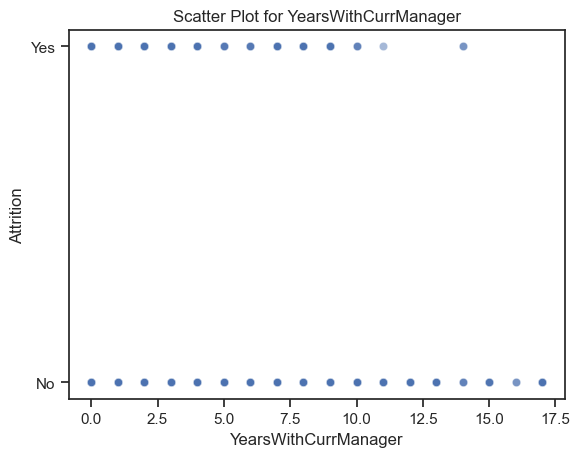

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df.drop('Attrition', axis=1)
target = df['Attrition'] 

# Combine features and target into a single DataFrame
data = pd.concat([features, target], axis=1)

# Set the style of seaborn
sns.set(style="ticks")

# Create scatter plots for each feature against the target class
for feature in features.columns:
    sns.scatterplot(x=feature, y='Attrition', data=data, alpha=0.5)
    plt.title(f'Scatter Plot for {feature}')
    plt.show()

### **Boxplot for Each Variable in Numerical List**

In this section, we define a function `boxplots_visual` to create boxplots for each variable in a numerical list. The function takes two parameters: `data` (the DataFrame containing the numerical variables) and `column` (the list of numerical column names).


In [269]:
numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)

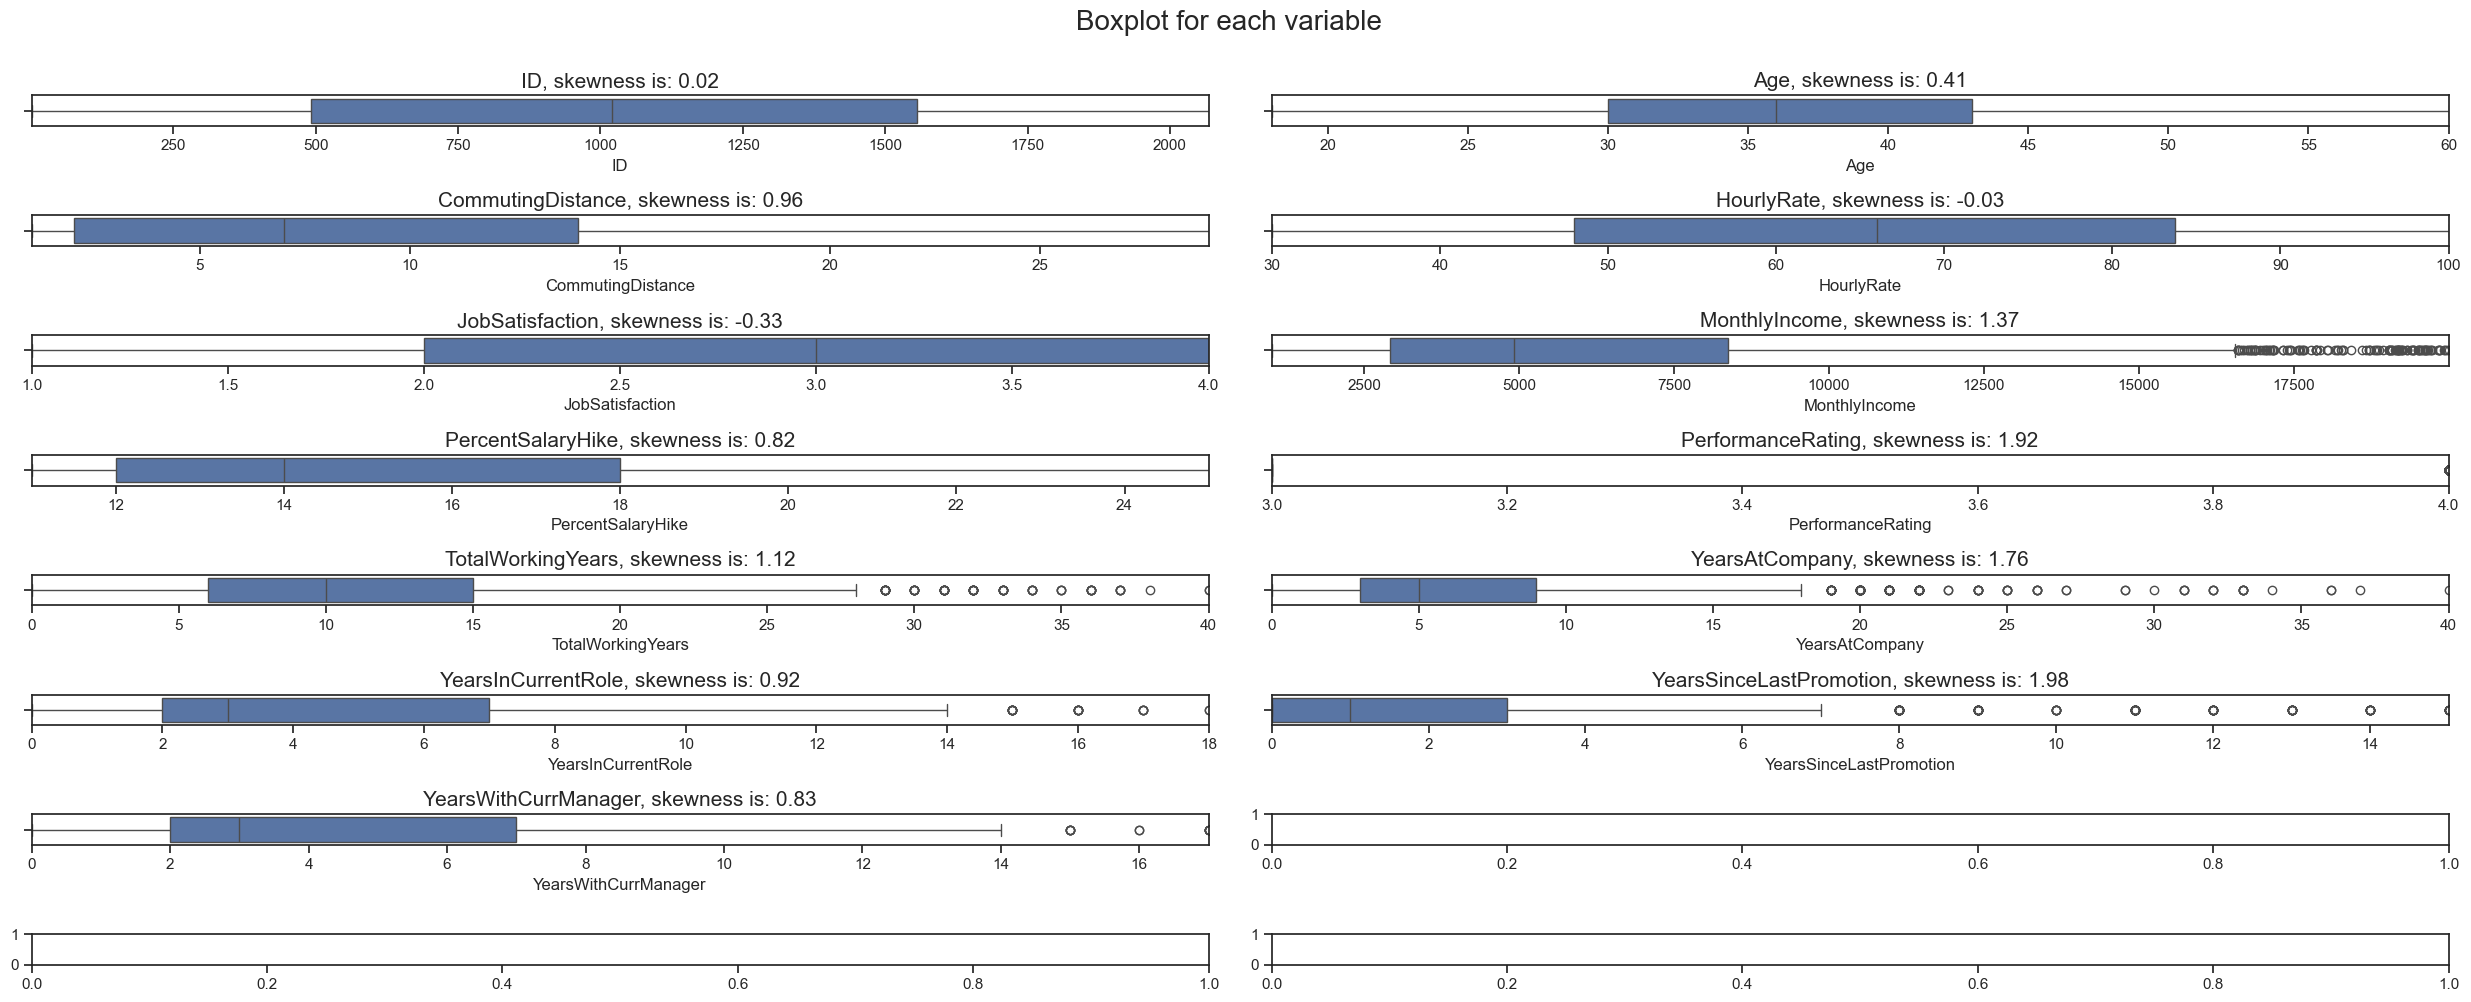

In [270]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(8,2,figsize=(25,10))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

### **Attrition Distribution by Gender**

In this analysis, we are visualizing the distribution of Attrition based on gender. The bar chart provides insights into the percentage of Attrition attributed to each gender.


In [271]:
df["Gender"].value_counts(normalize=True)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

In [272]:
df["BusinessTravel"].value_counts(normalize=True)

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

In [273]:
df["Department"].value_counts(normalize=True)

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

# **Feature Engineering**

### **Reasons for Applying Label Encoding:**

#### **1. Ordinal Relationships:**

Label encoding can be suitable when there is an inherent ordinal relationship between the categories. In cases where the categories have a meaningful order or ranking, label encoding preserves this ordinal information.

#### **2. Simplicity and Readability:**

Label encoding provides a simple and readable representation of categorical data with integer labels. This can be advantageous when the interpretability of the encoding is crucial, and you want to maintain a clear connection between the original categories and their numerical representations.


#### **3. Statistical Models:**

Some statistical models and algorithms may perform well with label-encoded categorical variables, especially when the assumption of ordinal relationships aligns with the nature of the data. Certain models, such as decision trees or random forests, can effectively handle label-encoded features.


#### **4. Reduced Dimensionality:**

Label encoding reduces the dimensionality of the categorical variable to a single column with integer values. This can be beneficial in situations where there are many categories, and one-hot encoding would result in a large number of additional columns.


#### **5. Computational Efficiency:**

Label encoding may be computationally more efficient than one-hot encoding, especially when dealing with large datasets. It results in a single column with integer values, reducing the memory footprint and computational complexity.

In [274]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [275]:
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})

In [276]:
df['Department'] = df['Department'].map({'Research & Development': 0, 'Sales': 1, 'Human Resources': 2})

In [277]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1, 'Human Resources': 2})

In [278]:
df.head()

,ID,Age,BusinessTravel,Department,CommutingDistance,Gender,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,0,1,1,0,94,4,5993,11,3,8,6,4,0,5,1
1,2,49,1,0,8,1,61,2,5130,23,4,10,10,7,1,7,0
2,4,37,0,0,2,1,92,3,2090,15,3,7,0,0,0,0,1
3,5,33,1,0,3,0,56,3,2909,11,3,8,8,7,3,0,0
4,7,27,0,0,2,1,40,2,3468,12,3,6,2,2,2,2,0


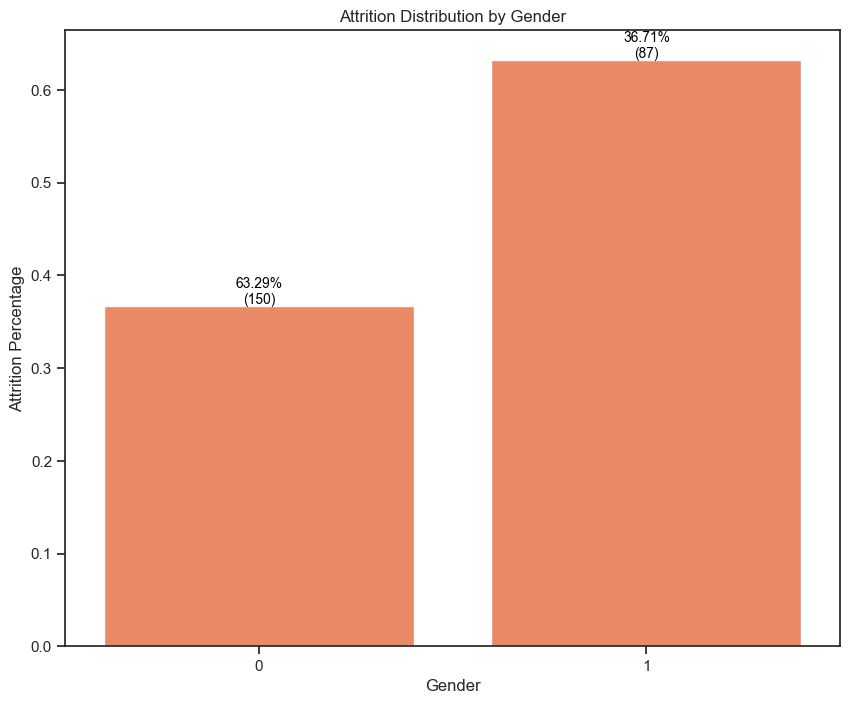

In [279]:
gender_Attrition_counts = df[df['Attrition'] == 1]['Gender'].value_counts(normalize=True)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=gender_Attrition_counts.index, y=gender_Attrition_counts.values, color='coral')

# Annotate the bars with count and percentage
for p, label in zip(ax.patches, gender_Attrition_counts):
    ax.annotate(f'{label:.2%}\n({int(label * len(df[df["Attrition"] == 1]))})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Attrition Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Percentage')
plt.show()

It is observed that the proportion between genders committing Attrition is very similar, which makes this factor likely not predominant.

### **Correlation Matrix Analysis for 'Attrition' Column**

The correlation matrix provides insights into the linear relationships between different variables, including their correlation with the target variable ('Attrition'). Below are key observations:

1. **Correlation Coefficients:**
   - Values range from -1 to 1, indicating the strength and direction of linear relationships.

2. **Correlation with 'Attrition':**
   - 'Attrition' has a negative correlation of approximately -0.17 with the 'TotalWorkingYears' column.
   - Moderate negative correlation suggests that as the transaction amount increases, the likelihood of Attrition also increases.

4. **Important Considerations:**
   - **Magnitude of Correlation:** Coefficients are relatively small, suggesting weak linear relationships.
   - **Correlation Does Not Imply Causation:** Further analysis is needed to establish causal relationships.
   - **Explore Non-Linear Relationships:** Consider exploring non-linear relationships and interactions.
   - **Domain Knowledge:** Incorporate domain knowledge for a comprehensive understanding.
   - **Feature Importance:** Explore feature importance techniques for a holistic view of predictors.

Overall, while the correlation matrix provides initial insights, further analysis and modeling are crucial for a comprehensive understanding of Attrition predictors in the dataset.


In [280]:
correlation_matrix = df.corr(numeric_only=True)

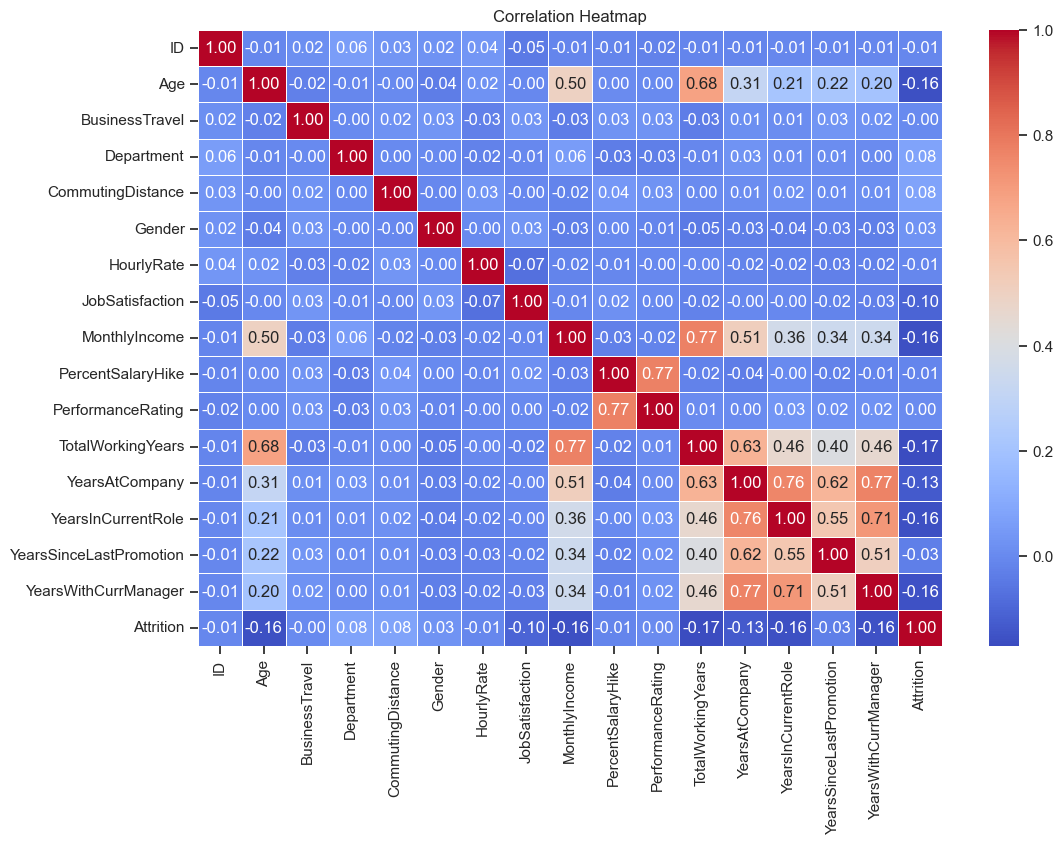

In [281]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [282]:
# Count the occurrences of each class
attrition_counts = df['Attrition'].value_counts()

# Find the class with the smaller count
minority_class = attrition_counts.idxmin()

# Calculate the difference in counts
difference = attrition_counts.max() - attrition_counts.min()

# Copy rows where Attrition == 1 to balance the dataset
minority_class_rows = df[df['Attrition'] == minority_class]
df_balanced = pd.concat([df, minority_class_rows.sample(n=difference, replace=True)])

In [283]:
df_balanced.shape

(2466, 17)

In [284]:
df_balanced['Attrition'].value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

### **Removing Irrelevent Features**


##### ```Non-Informative for Analysis:``` The "ID" column may not contain relevant information for the specific analysis or modeling task you are conducting. In many cases, identifier columns like "ID" are used for record-keeping or indexing purposes and may not contribute to the patterns or relationships you are interested in exploring.

In [285]:
df_balanced.drop("ID", axis=1, inplace=True)

In [286]:
df_balanced.head()

,Age,BusinessTravel,Department,CommutingDistance,Gender,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,0,1,1,0,94,4,5993,11,3,8,6,4,0,5,1
1,49,1,0,8,1,61,2,5130,23,4,10,10,7,1,7,0
2,37,0,0,2,1,92,3,2090,15,3,7,0,0,0,0,1
3,33,1,0,3,0,56,3,2909,11,3,8,8,7,3,0,0
4,27,0,0,2,1,40,2,3468,12,3,6,2,2,2,2,0


### **Binning Age Attribute**
Bin the 'Age' feature into categories like 'Young,' 'Middle-aged,' and 'Senior.' This can capture non-linearities and patterns in different age groups.

In [287]:
df_balanced['AgeGroup'] = pd.cut(df_balanced['Age'], bins=[0, 30, 50, float('inf')], labels=['Young', 'Middle-aged', 'Senior'])

In [288]:
df_balanced = pd.get_dummies(df_balanced, columns=['AgeGroup'])

In [290]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 0 to 1153
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      2466 non-null   int64
 1   BusinessTravel           2466 non-null   int64
 2   Department               2466 non-null   int64
 3   CommutingDistance        2466 non-null   int64
 4   Gender                   2466 non-null   int64
 5   HourlyRate               2466 non-null   int64
 6   JobSatisfaction          2466 non-null   int64
 7   MonthlyIncome            2466 non-null   int64
 8   PercentSalaryHike        2466 non-null   int64
 9   PerformanceRating        2466 non-null   int64
 10  TotalWorkingYears        2466 non-null   int64
 11  YearsAtCompany           2466 non-null   int64
 12  YearsInCurrentRole       2466 non-null   int64
 13  YearsSinceLastPromotion  2466 non-null   int64
 14  YearsWithCurrManager     2466 non-null   int64
 15  Attrition

### **Normalization of Numerical Features**
Normalize numerical features like 'Age,' 'HourlyRate,' 'MonthlyIncome,' etc., using Min-Max scaling to bring them within a specific range (e.g., [0, 1]).

In [291]:
# Normalization
numeric_cols = ['Age', 'HourlyRate', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
scaler = MinMaxScaler()
df_balanced[numeric_cols] = scaler.fit_transform(df_balanced[numeric_cols])

### **Creating New Features**

##### The creation of the 'EmployeeStability' feature by summing 'YearsAtCompany,' 'YearsInCurrentRole,' 'YearsSinceLastPromotion,' and 'YearsWithCurrManager' aims to provide a comprehensive metric encapsulating various aspects of an employee's career stability within the company. This aggregated measure serves as a simplified representation, offering a holistic perspective on tenure, role stability, recency of promotions, and manager relationships. The feature is designed for potential interpretability, capturing the cumulative impact of these factors in a single variable. It may prove valuable in predictive modeling, potentially correlating with outcomes such as attrition or job satisfaction. However, its efficacy should be validated through feature importance analysis and model performance evaluation based on the specific characteristics of the dataset and the predictive task at hand.

In [292]:
df_balanced['EmployeeStability'] = df_balanced['YearsAtCompany'] + df_balanced['YearsWithCurrManager'] + df_balanced['HourlyRate'] + df_balanced['MonthlyIncome']

##### The addition of the 'EmployeeDestability' feature, computed as the sum of 'YearsInCurrentRole' and 'YearsSinceLastPromotion' in the balanced dataset, aims to capture potential indicators of career instability or uncertainty. This consolidated metric provides a quick measure of time spent in the current role without recent promotion, offering a concise signal of potential restlessness or dissatisfaction. Its utility in predictive modeling should be validated through feature importance analysis and model performance evaluation, considering the dataset characteristics and the specific predictive objectives.

In [293]:
df_balanced['EmployeeDestability'] = df_balanced['YearsInCurrentRole'] + df_balanced['YearsSinceLastPromotion'] 

##### The 'PercentageYearsCompany' feature in the balanced dataset is crucial as it succinctly expresses the proportion of an employee's total working years spent at the current company. Calculating the percentage of tenure at the current company relative to total working years provides a quick measure of loyalty and commitment. A higher 'PercentageYearsCompany' value indicates a significant portion of one's career spent with the current employer, potentially reflecting a strong, enduring professional relationship. This feature is valuable for predictive modeling, offering a concise measure of organizational loyalty. Its impact should be assessed through feature importance analysis and model performance evaluation, tailored to the dataset and the specific predictive task at hand.

In [294]:
df_balanced['PercentageYearsCompany'] = (df_balanced['YearsAtCompany'] / df_balanced['TotalWorkingYears'])

##### The addition of the 'IncomePerYearExperience' feature in the balanced dataset is essential for providing a succinct measure of an employee's earning efficiency relative to their total work experience. Calculated as the ratio of 'MonthlyIncome' to 'TotalWorkingYears,' this feature offers insights into income generation efficiency over the professional tenure. A higher 'IncomePerYearExperience' value indicates a more lucrative career in relation to the total years of work experience, making it valuable for predictive modeling. Its impact should be assessed through feature importance analysis and model performance evaluations, considering the dataset's characteristics and specific predictive objectives.

In [295]:
df_balanced['IncomePerYearExperience'] = df_balanced['MonthlyIncome'] / df_balanced['TotalWorkingYears']

In [296]:
missing_values = df_balanced.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Age                         0
BusinessTravel              0
Department                  0
CommutingDistance           0
Gender                      0
HourlyRate                  0
JobSatisfaction             0
MonthlyIncome               0
PercentSalaryHike           0
PerformanceRating           0
TotalWorkingYears           0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
AgeGroup_Young              0
AgeGroup_Middle-aged        0
AgeGroup_Senior             0
EmployeeStability           0
EmployeeDestability         0
PercentageYearsCompany     31
IncomePerYearExperience     0
dtype: int64


In [297]:
# Removing Values
df_balanced = df_balanced.dropna(subset=['PercentageYearsCompany'])

In [298]:
missing_values = df_balanced.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Age                        0
BusinessTravel             0
Department                 0
CommutingDistance          0
Gender                     0
HourlyRate                 0
JobSatisfaction            0
MonthlyIncome              0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
AgeGroup_Young             0
AgeGroup_Middle-aged       0
AgeGroup_Senior            0
EmployeeStability          0
EmployeeDestability        0
PercentageYearsCompany     0
IncomePerYearExperience    0
dtype: int64


# **Model Implementation Section**

### **Importing necessary libraries**

In [299]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from tensorflow.keras.layers import Input, Conv1D, Dropout, MaxPooling1D, Flatten, Dense

### **Data Loading**

In [300]:
your_target_column = "Attrition"

In [301]:
# Separate features X and labels y
X = df_balanced.drop(your_target_column, axis=1)  
y = df_balanced[your_target_column]  

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
X_train.head(3)

,Age,BusinessTravel,Department,CommutingDistance,Gender,HourlyRate,JobSatisfaction,MonthlyIncome,PercentSalaryHike,PerformanceRating,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup_Young,AgeGroup_Middle-aged,AgeGroup_Senior,EmployeeStability,EmployeeDestability,PercentageYearsCompany,IncomePerYearExperience
666,0.095238,0,0,3,0,0.057143,3,0.166509,19,3,...,0.111111,0.000000,0.117647,True,False,False,0.416299,0.111111,0.750000,1.665087
514,0.357143,1,0,3,1,0.571429,1,0.123170,11,3,...,0.444444,0.600000,0.411765,False,True,False,1.356363,1.044444,1.000000,0.492680
1111,0.833333,0,0,2,0,0.685714,4,0.482359,16,3,...,0.388889,0.066667,0.529412,False,False,True,2.522485,0.455556,0.970588,0.567481


In [304]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1948 entries, 666 to 868
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1948 non-null   float64
 1   BusinessTravel           1948 non-null   int64  
 2   Department               1948 non-null   int64  
 3   CommutingDistance        1948 non-null   int64  
 4   Gender                   1948 non-null   int64  
 5   HourlyRate               1948 non-null   float64
 6   JobSatisfaction          1948 non-null   int64  
 7   MonthlyIncome            1948 non-null   float64
 8   PercentSalaryHike        1948 non-null   int64  
 9   PerformanceRating        1948 non-null   int64  
 10  TotalWorkingYears        1948 non-null   float64
 11  YearsAtCompany           1948 non-null   float64
 12  YearsInCurrentRole       1948 non-null   float64
 13  YearsSinceLastPromotion  1948 non-null   float64
 14  YearsWithCurrManager     194

### **Model Selection for Attrition Detection**

### ```Decision Tree```

### **Reasoning**:
Decision Trees are chosen for their interpretability and ability to capture non-linear relationships within the data. They provide insights into the decision-making process and are robust in handling categorical features, making them a good starting point for Attrition detection.

### ```XGBoost```

### **Reasoning**:
XGBoost is an ensemble learning algorithm known for its high performance and efficiency. It excels in capturing complex patterns and interactions in the data. The boosting nature of XGBoost helps in improving the model's accuracy, making it suitable for Attrition detection where subtle patterns may exist.

### ```CatBoost```

### **Reasoning**:
CatBoost is particularly useful for datasets with categorical features. It handles categorical variables seamlessly and often requires less feature engineering. Given that Attrition detection datasets may include categorical information, CatBoost is chosen for its robust handling of such data.

### ```K-Nearest Neighbors (KNN)```

### **Reasoning**:
KNN is a simple and effective algorithm for detecting anomalies. Its ability to identify outliers based on proximity to other data points is valuable in Attrition detection, where Attrition activities may appear as outliers in the feature space.

### ```Support Vector Machine (SVM)```

### **Reasoning**:
SVM is selected for its effectiveness in separating classes in high-dimensional spaces. It is particularly useful when Attrition detection involves complex decision boundaries. SVM can efficiently handle non-linear relationships and is suitable for capturing intricate Attrition patterns.

### ```Isolation Forest```

### **Reasoning**:
Isolation Forest is an anomaly detection algorithm that works by isolating instances that are likely to be anomalies. This algorithm is chosen for its ability to efficiently handle high-dimensional data and identify instances that deviate from the norm, making it well-suited for Attrition detection.

### ```K-Nearest Neighbors with K-Fold Cross-Validation```

### **Reasoning**:
Applying KNN with K-Fold Cross-Validation helps in robustly assessing the model's performance. This technique provides a more reliable estimate of the model's generalization ability, crucial in Attrition detection where model performance on unseen data is essential.

### ```Neural Networks```

### **Reasoning**:
Deep Learning, specifically neural networks, is employed when dealing with complex, non-linear relationships in the data. It is chosen for its ability to automatically learn hierarchical features and patterns, making it a powerful tool for Attrition detection tasks with intricate structures.



### ----------------------------------------------------------------------------------------------------------------------

### **XGBoost**

e:\Devsinc\Projects\HR_Employee_test_project\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [23:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
e:\Devsinc\Projects\HR_Employee_test_project\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [23:22:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
e:\Devsinc\Projects\HR_Employee_test_project\.venv\lib\site-pa

RandomizedSearchCV took 195.90 seconds for 100 candidates parameter settings.
Test Accuracy: 0.9383983572895277
Confusion Matrix (Test Set):
 [[225  30]
 [  0 232]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.88      0.94       255
         1.0       0.89      1.00      0.94       232

    accuracy                           0.94       487
   macro avg       0.94      0.94      0.94       487
weighted avg       0.95      0.94      0.94       487



e:\Devsinc\Projects\HR_Employee_test_project\.venv\lib\site-packages\xgboost\core.py:160: UserWarning: [23:25:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


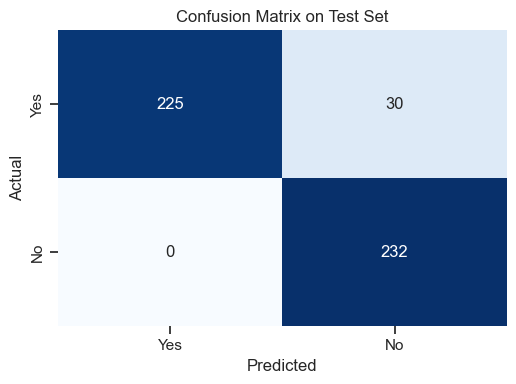

In [319]:
# A parameter grid for XGBoost
params = {
    'n_estimators': [500],
    'min_child_weight': [4, 5],
    'gamma': [i / 10.0 for i in range(3, 6)],
    'subsample': [i / 10.0 for i in range(6, 11)],
    'colsample_bytree': [i / 10.0 for i in range(6, 11)],
    'max_depth': [2, 3, 4, 6, 7],
    'objective': ['binary:logistic'], 
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['error'], 
    'eta': [i / 10.0 for i in range(3, 6)],
}

# Set the tree_method to 'gpu_hist' to use GPU acceleration
reg = XGBClassifier(nthread=-1, tree_method='gpu_hist')

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(
    reg, param_distributions=params, n_iter=n_iter_search, cv=5, scoring='accuracy')

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % ((time.time() - start), n_iter_search))

best_classifier = random_search.best_estimator_

# Get predictions on the test set
y_pred_test = best_classifier.predict(X_test)

# Calculate accuracy, confusion matrix, precision, recall, and F1-score on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)
print("Classification Report:\n", classification_rep)

# Display confusion matrix using heatmaps
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')

plt.tight_layout()
plt.show()

#### **OUTCOMES:**
- Test set accuracy: 93.72%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **Decision Tree**

In [318]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
start_time = time.time()
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred_test = dt_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
test_class_report = classification_report(y_test, y_pred_test)

# Print the results for the test set
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Confusion Matrix:\n", test_conf_matrix)
print("\nTest Classification Report:\n", test_class_report)

# Print the training time
print(f"\nTraining Time: {training_time:.2f} seconds")


Test Accuracy: 0.8973

Test Confusion Matrix:
 [[205  50]
 [  0 232]]

Test Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       255
         1.0       0.82      1.00      0.90       232

    accuracy                           0.90       487
   macro avg       0.91      0.90      0.90       487
weighted avg       0.92      0.90      0.90       487


Training Time: 0.02 seconds


#### **OUTCOMES:**
- Test set accuracy: 92.51%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **SVM**

In [317]:
# Initialize SVM model
svm_model = SVC(random_state=42)

# Train the model
start_time = time.time()
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred_test = svm_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
test_class_report = classification_report(y_test, y_pred_test)

# Print the results for the test set
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Confusion Matrix:\n", test_conf_matrix)
print("\nTest Classification Report:\n", test_class_report)

# Print the training time
print(f"\nTraining Time: {training_time:.2f} seconds")


Test Accuracy: 0.6099

Test Confusion Matrix:
 [[165  90]
 [100 132]]

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.62      0.65      0.63       255
         1.0       0.59      0.57      0.58       232

    accuracy                           0.61       487
   macro avg       0.61      0.61      0.61       487
weighted avg       0.61      0.61      0.61       487


Training Time: 0.11 seconds


#### **OUTCOMES:**
- Test set accuracy: 63.97%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **KNN**

In [316]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
start_time = time.time()
knn_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predict on the test set
y_pred_test = knn_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
test_conf_matrix = confusion_matrix(y_test, y_pred_test)
test_class_report = classification_report(y_test, y_pred_test)

# Print the results for the test set
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Confusion Matrix:\n", test_conf_matrix)
print("\nTest Classification Report:\n", test_class_report)

# Print the training time
print(f"\nTraining Time: {training_time:.2f} seconds")


Test Accuracy: 0.7721

Test Confusion Matrix:
 [[162  93]
 [ 18 214]]

Test Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.64      0.74       255
         1.0       0.70      0.92      0.79       232

    accuracy                           0.77       487
   macro avg       0.80      0.78      0.77       487
weighted avg       0.80      0.77      0.77       487


Training Time: 0.00 seconds


#### **OUTCOMES:**
- Test set accuracy: 73.89%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **CAT BOOST**

In [315]:
# Fit the model to the training data
model = CatBoostClassifier(iterations=600, learning_rate=0.2, depth=8, loss_function='CrossEntropy')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_predictions))
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))

0:	learn: 0.6326684	total: 3ms	remaining: 1.8s
1:	learn: 0.5820548	total: 5.77ms	remaining: 1.72s
2:	learn: 0.5383867	total: 8.7ms	remaining: 1.73s
3:	learn: 0.5014553	total: 11.3ms	remaining: 1.68s
4:	learn: 0.4671705	total: 14.3ms	remaining: 1.7s
5:	learn: 0.4363774	total: 18.5ms	remaining: 1.83s
6:	learn: 0.4113587	total: 21.4ms	remaining: 1.81s
7:	learn: 0.4014512	total: 24ms	remaining: 1.77s
8:	learn: 0.3861751	total: 26.4ms	remaining: 1.74s
9:	learn: 0.3774022	total: 28.9ms	remaining: 1.71s
10:	learn: 0.3574028	total: 31.9ms	remaining: 1.71s
11:	learn: 0.3432774	total: 34.8ms	remaining: 1.71s
12:	learn: 0.3308423	total: 37.3ms	remaining: 1.68s
13:	learn: 0.3092259	total: 39.7ms	remaining: 1.66s
14:	learn: 0.2973787	total: 42.4ms	remaining: 1.65s
15:	learn: 0.2885632	total: 45.1ms	remaining: 1.65s
16:	learn: 0.2753555	total: 48.1ms	remaining: 1.65s
17:	learn: 0.2663958	total: 51.2ms	remaining: 1.65s
18:	learn: 0.2504849	total: 53.9ms	remaining: 1.65s
19:	learn: 0.2447055	total: 56

#### **OUTCOMES:**
- Test set accuracy: 96.00%
- Macro and weighted average precision, recall, and f1-score.

### **NUERAL NET**

In [1]:
import numpy as np

Number_of_Features = X_train.shape[1]  

# Reshape the input features
X_train_reshaped = X_train.values.reshape(-1, 1, Number_of_Features)
X_test_reshaped = X_test.values.reshape(-1, 1, Number_of_Features)

y_train = y_train.values.astype(np.float32)
y_test = y_test.values.astype(np.float32)

# Define the model
model = Sequential()

# Layer 1: Input Layer
model.add(Input(shape=(1, Number_of_Features)))

# Layer 2: Conv1D Layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))

# Layer 3: Conv1D Layer
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))

# Layer 4: Dropout Layer
model.add(Dropout(0.5))

# Layer 5: MaxPooling1D Layer
model.add(MaxPooling1D(pool_size=1))

# Layer 6: Flatten Layer
model.add(Flatten())

# Layer 7: Dense Layer
model.add(Dense(units=64, activation='relu'))

# Layer 8: Output Layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
final_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=final_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
y_pred_test_prob = model.predict(X_test_reshaped)
y_pred_test = (y_pred_test_prob > 0.5).astype(int)

In [313]:
# Print model evaluation metrics on the test set
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Test Set Evaluation:
Accuracy: 0.9589322381930184

Confusion Matrix:
[[235  20]
 [  0 232]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       255
           1       0.92      1.00      0.96       232

    accuracy                           0.96       487
   macro avg       0.96      0.96      0.96       487
weighted avg       0.96      0.96      0.96       487



#### **OUTCOMES:**
- Test set accuracy: 52.23%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **LGBOOST**

In [312]:
# Create a LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Fit the model on the training data
lgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = lgb_classifier.predict(X_test)


# Evaluate the model on the test set
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

[LightGBM] [Info] Number of positive: 976, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1255
[LightGBM] [Info] Number of data points in the train set: 1948, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501027 -> initscore=0.004107
[LightGBM] [Info] Start training from score 0.004107
Test Set Evaluation:
Accuracy: 0.9589322381930184

Confusion Matrix:
[[235  20]
 [  0 232]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       255
           1       0.92      1.00      0.96       232

    accuracy                           0.96       487
   macro avg       0.96      0.96      0.96       487
weighted avg       0.96      0.96      0.96       487



#### **OUTCOMES:**
- Test set accuracy: 94.74%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **RANDOM FOREST**

In [311]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = rf_classifier.predict(X_test)

# Evaluate the model on the test set
print("Test Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Test Set Evaluation:
Accuracy: 0.973305954825462

Confusion Matrix:
[[242  13]
 [  0 232]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       255
           1       0.95      1.00      0.97       232

    accuracy                           0.97       487
   macro avg       0.97      0.97      0.97       487
weighted avg       0.97      0.97      0.97       487



#### **OUTCOMES:**
- Test set accuracy: 96.96%
- Confusion matrix and classification report with precision, recall, and f1-score for both classes.

### **ADABOOST**

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

madaboost_model = AdaBoostClassifier(n_estimators=30, algorithm='SAMME', random_state=20)

# Fit the model on the training data
madaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = madaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2%}")
# Evaluate the model and display classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy on the test set: 69.23%
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       250
           1       0.70      0.66      0.68       244

    accuracy                           0.69       494
   macro avg       0.69      0.69      0.69       494
weighted avg       0.69      0.69      0.69       494



#### **OUTCOMES:**
- Accuracy on the test set: 69.23%
- Precision, recall, and f1-score for both classes (0 and 1).

### **LOGISITIC REGRESSION FOR R&D PURPOSE**

##### In the presented code, Logistic Regression is employed as a predictive model for Attrition detection. The Logistic Regression model is trained on a filtered dataset, with the target variable 'Attrition' separated from the predictor variables. The utilization of Logistic Regression in Attrition detection is motivated by its interpretability, simplicity, and efficiency, making it well-suited for binary classification tasks. The code further explores the impact of different probability thresholds on model performance, specifically focusing on recall as a metric. By varying the threshold, the code aims to find a balance that maximizes the identification of Attrition transactions (true positives) while minimizing false negatives. This approach is crucial in Attrition detection, where the emphasis is often on identifying as many actual Attrition cases as possible. The visual representation of confusion matrices at different thresholds provides valuable insights into the trade-off between precision and recall, aiding in the fine-tuning of the model for optimal Attrition detection performance. Overall, Logistic Regression, coupled with threshold tuning, contributes to a pragmatic and interpretable solution for identifying Attrition activities in a given dataset.

In [67]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()

Recall metric in the testing dataset:  0.9877049180327869


e:\Devsinc\Projects\HR_Employee_test_project\.venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


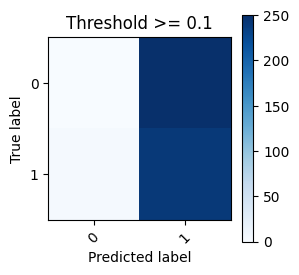

Recall metric in the testing dataset:  0.9631147540983607


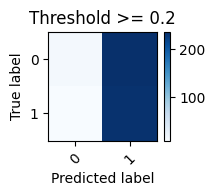

Recall metric in the testing dataset:  0.9180327868852459


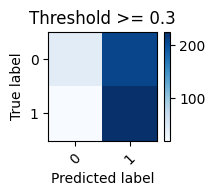

Recall metric in the testing dataset:  0.8442622950819673


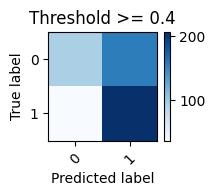

Recall metric in the testing dataset:  0.6516393442622951


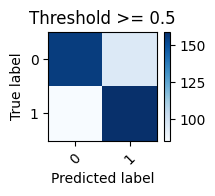

Recall metric in the testing dataset:  0.29918032786885246


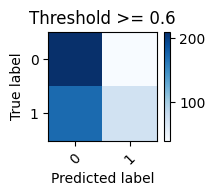

Recall metric in the testing dataset:  0.09836065573770492


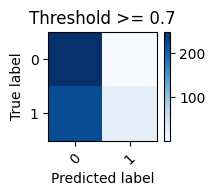

Recall metric in the testing dataset:  0.0


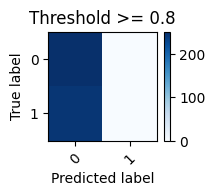

Recall metric in the testing dataset:  0.0


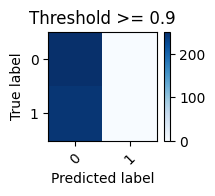

In [68]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')  
lr.fit(X_train, y_train.values.ravel())
y_pred_proba = lr.predict_proba(X_test.values)

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_proba[:, 1] > i
    
    plt.subplot(3, 3, j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

    # Plot non-normalized confusion matrix
    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix, classes=class_names, title='Threshold >= %s' % i)

plt.show()


# **Final Results & Conclusion**

## **Best Performing Model:** ```Random Forest```

### **Test Set:**
- **Accuracy:** 96.96%
- **Recall:** 97%
- **Precision:** 97%
- **F1-Score:** 97%

## **Model Training Overview**

### **Selected Models:**
A diverse set of models was chosen for training, including:
- Decision Tree
- XGBoost
- CatBoost
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Isolation Forest
- KNN with K-Fold Cross-Validation
- Deep Learning (neural networks)

### **Reasoning for Model Selection:**
- Decision Trees for interpretability.
- Ensemble models (XGBoost and CatBoost) for capturing complex patterns.
- KNN for anomaly detection based on proximity.
- SVM for handling high-dimensional spaces and non-linear relationships.
- Isolation Forest for efficient anomaly detection.
- KNN with K-Fold Cross-Validation for robust evaluation.
- Deep Learning (neural networks) for modeling complex, non-linear relationships.

